BUSI Problem Set 2 

PART A - No skilled funds 
// Simulation of fund returns 
// Regres to estimate alphas, betas, and  t-statistics 
// Bootstrap to assess the distribution of the estimated alphas' t-statistics 
// Print relevant statistics & plot the distribution of the actual t-statistics

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

N = 1000 
T = 120
B = 100 
market_return_mean = 0.05 / 12 
market_return_sd = 0.2 / np.sqrt(12) 
residual_sd = 0.1 / np.sqrt(12) 

In [3]:
# 1 - Simulate market returns and fund returns
market_returns = np.random.normal(market_return_mean, market_return_sd, T)
funds_returns = np.zeros((N, T))
alphas = np.zeros(N)
betas = np.zeros(N)
t_stats = np.zeros(N)

for i in range(N):
    residuals = np.random.normal(0, residual_sd, T)
    fund_returns = market_returns + residuals  
    funds_returns[i, :] = fund_returns
    
    # Step 2: Regression 
    X = sm.add_constant(market_returns)  
    model = sm.OLS(fund_returns, X).fit()
    alphas[i] = model.params[0]
    betas[i] = model.params[1]
    t_stats[i] = model.tvalues[0]

mean_alpha = np.mean(alphas)
mean_beta = np.mean(betas)
mean_t_stat = np.mean(t_stats) 

print(f"Average Alpha: {mean_alpha:.4f}")
print(f"Average Beta: {mean_beta:.4f}")
print(f"Average T-Statistic for Alpha: {mean_t_stat:.4f}") 

Average Alpha: -0.0000
Average Beta: 1.0023
Average T-Statistic for Alpha: -0.0191


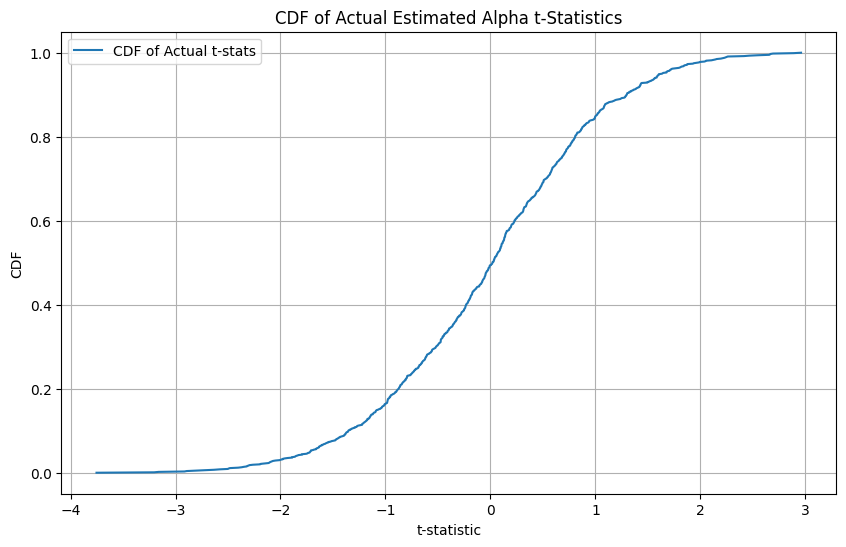

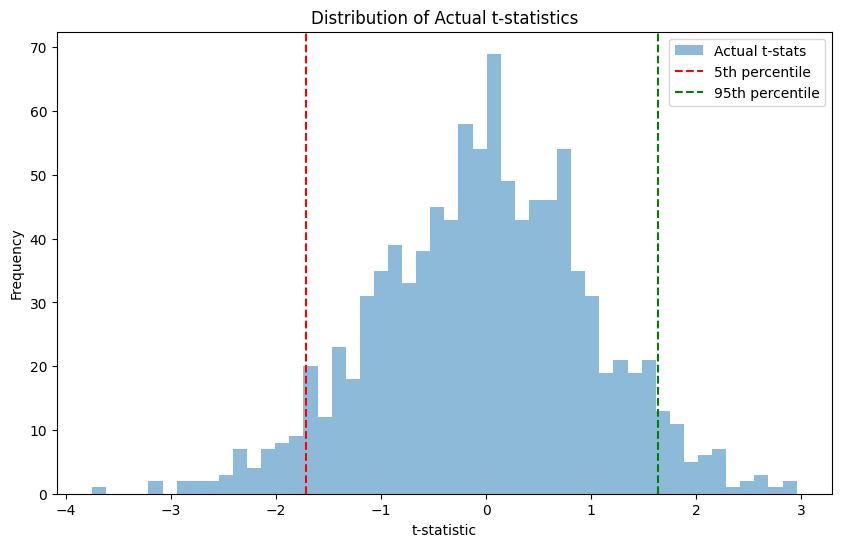

In [4]:
# 3 - Bootstrap 
bootstrap_t_stats = np.zeros((B, N))
for b in range(B):
    for i in range(N):
        bootstrap_sample = np.random.choice(T, size=T, replace=True)
        bootstrap_fund_returns = funds_returns[i, bootstrap_sample]
        X_bootstrap = sm.add_constant(market_returns[bootstrap_sample])
        model_bootstrap = sm.OLS(bootstrap_fund_returns, X_bootstrap).fit()
        bootstrap_t_stats[b, i] = model_bootstrap.tvalues[0]

sorted_t_stats = np.sort(t_stats)
cdf_actual = np.arange(1, N+1) / N

bootstrap_t_stats_sorted = np.sort(bootstrap_t_stats, axis=1)
bootstrap_cdf_mean = np.mean(np.arange(1, N+1) / N, axis=0)

# 4 - Plotting results for the actual t-statistics
plt.figure(figsize=(10, 6))
plt.plot(sorted_t_stats, cdf_actual, label='CDF of Actual t-stats')
plt.title('CDF of Actual Estimated Alpha t-Statistics')
plt.xlabel('t-statistic')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

# Plotting results for the bootstrap t-statistics
plt.figure(figsize=(10, 6))
plt.hist(t_stats, bins=50, alpha=0.5, label='Actual t-stats')
plt.axvline(x=np.percentile(t_stats, 5), color='r', linestyle='--', label='5th percentile')
plt.axvline(x=np.percentile(t_stats, 95), color='g', linestyle='--', label='95th percentile')
plt.legend()
plt.xlabel('t-statistic')
plt.ylabel('Frequency')
plt.title('Distribution of Actual t-statistics')
plt.show() 